In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

import warnings
from  IPython.utils.shimmodule import ShimWarning
warnings.filterwarnings('error','', ShimWarning)

In [2]:
from iuvs import io

/usr/local/python3/miniconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
from iuvs.apoapse import *

The `selector` is a dataframe of booleans that check for each integration which spatial pixels are on the Martian disk, meaning their 'over-limb altitude' is larger 0:

In [4]:
sns.set_context('talk')

In [5]:
from ipyparallel import Client

In [17]:
c = Client()

In [18]:
lbview = c.load_balanced_view()

In [19]:
def process_daystring(daystring):
    from iuvs.apoapse import process_day
    process_day(daystring, 255)

In [20]:
days = [str(i) for i in range(20141110,20141120)]

In [12]:
results = lbview.map_async(process_daystring, days)

In [13]:
for res in results:
    print(res)

RemoteError: ValueError(need at least one array to concatenate)

In [150]:
process_days(['20150109'], 290, channel='muv')

/maven_iuvs/production/products/level1b
mvn_iuv_l1b_apoapse-orbit00543-muv_20150109T201627_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00543-muv_20150109T201105_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00541-muv_20150109T101352_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00543-muv_20150109T195503_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00543-muv_20150109T193859_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00543-muv_20150109T194419_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00543-muv_20150109T200545_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00541-muv_20150109T105640_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00542-muv_20150109T143743_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00543-muv_20150109T191214_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00542-muv_20150109T150427_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00539-muv_20150109T004845_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00541-muv_20150109T095750_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-orbit00541-muv_20150109T105120_v02_r01.fits.gz
mvn_iuv_l1b_apoapse-or

In [7]:
%matplotlib nbagg

In [8]:
sns.set_context('talk')

In [9]:
def shift_lons(lon):
    if lon > 180:
        return -(360 - lon)
    else:
        return lon

<IPython.core.display.Javascript object>


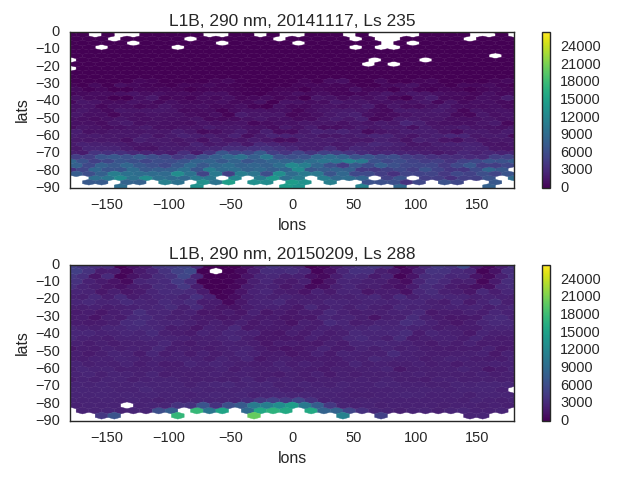

In [25]:
df1 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117_290.h5')
df2 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20150209_290.h5')
fig, axes = plt.subplots(nrows=2, sharex=False, figsize=(8,6))
vmax = max(df1.data.max(), df2.data.max())
for ax, df,t in zip(axes, [df1, df2], ['20141117, Ls 235', '20150209, Ls 288']): #, df2, df3]):
    df.lons = df.lons.map(shift_lons)
    df.plot(kind='hexbin', x='lons', y='lats', C='data', mincnt=1, gridsize=35,
            cmap='viridis', title='L1B, 290 nm, '+t, vmax=vmax, ax=ax, 
            ylim=(-90,0))
fig.tight_layout()
fig.savefig('L1B_comparison_lons_swapped.pdf', dpi=150)

<IPython.core.display.Javascript object>


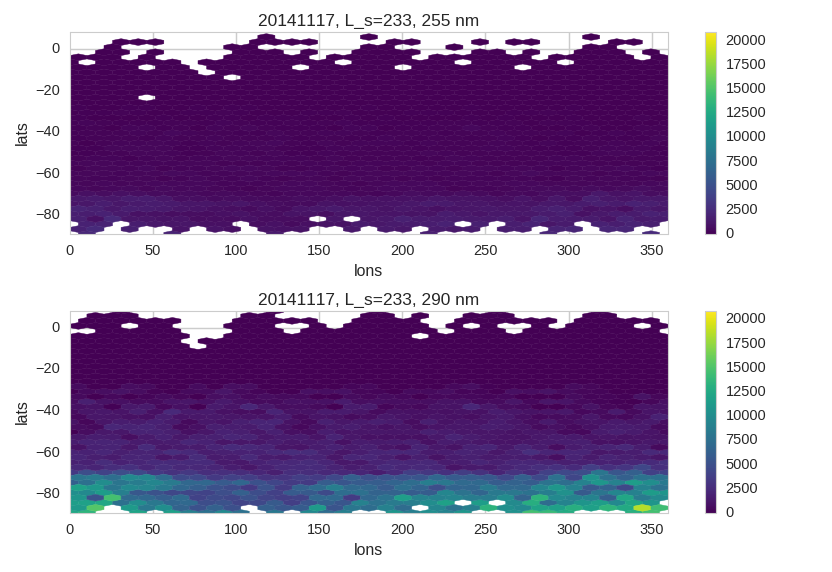

In [35]:
df1 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117_255.h5')
df2 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117_290.h5')
fig, axes = plt.subplots(nrows=2, sharex=False)
vmax = max(df1.data.max(), df2.data.max())
for ax, df,t in zip(axes, [df1, df2], ['255 nm', '290 nm']): #, df2, df3]):
    df.plot(kind='hexbin', x='lons', y='lats', C='data', mincnt=1, gridsize=35,
            cmap='viridis', title='20141117, L_s=233, '+t, vmax=vmax, ax=ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


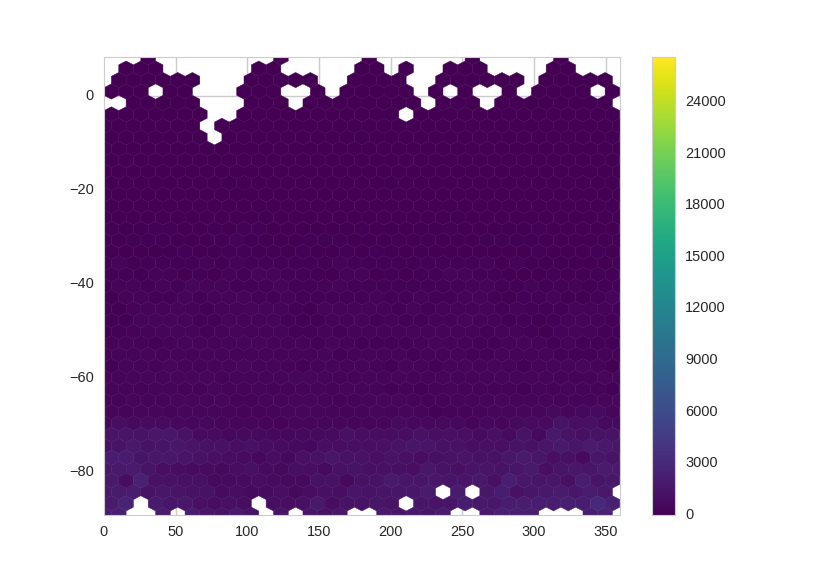

In [155]:
plt.figure()
df = df255
plt.hexbin(df.lons, df.lats, df.data, mincnt=1, gridsize=35,
           cmap='viridis', vmax=df300.data.max())
plt.colorbar()

<IPython.core.display.Javascript object>


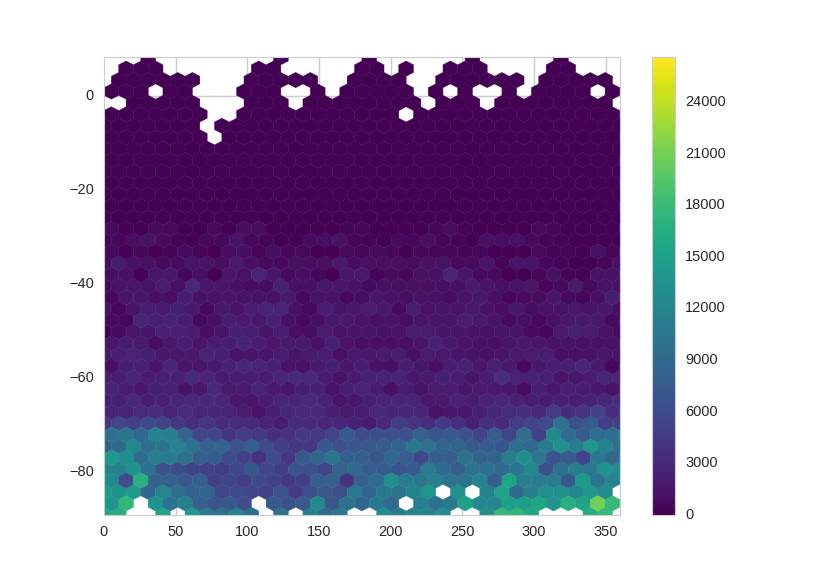

In [156]:
plt.figure()
df = df300
plt.hexbin(df.lons, df.lats, df.data, mincnt=1, gridsize=35,
           cmap='viridis', vmax=df.data.max())
plt.colorbar()

<IPython.core.display.Javascript object>


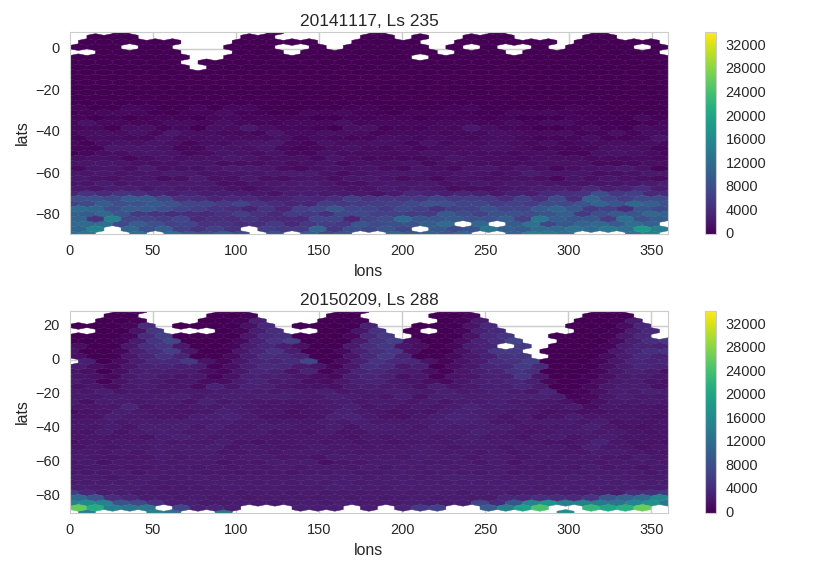

In [38]:
df0 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117_290.h5')
df1 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141215_290.h5')
df2 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20150115_290.h5')
df3 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20150209_290.h5')
fig, axes = plt.subplots(nrows=2, sharex=False)
vmax = df1.data.max()
for ax, df,t in zip(axes, [df0, df3], ['20141117, Ls 235', '20150209, Ls 288']): #, df2, df3]):
    df.plot(kind='hexbin', x='lons', y='lats', C='data', mincnt=1, gridsize=35,
            cmap='viridis', vmax=vmax, ax=ax, title=t)
fig.tight_layout()

<IPython.core.display.Javascript object>


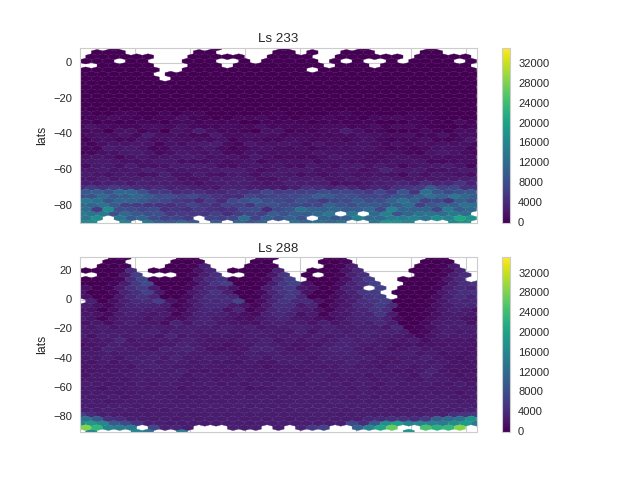

In [192]:
df0 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117_300.h5')
df1 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141215_300.h5')
df2 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20150115_300.h5')
df3 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20150209_300.h5')
fig, axes = plt.subplots(nrows=2, sharex=True)
vmax = df1.data.max()
for ax, df,t in zip(axes, [df0, df3], ['Ls 233','Ls 288']): #, df2, df3]):
    df.plot(kind='hexbin', x='lons', y='lats', C='data', mincnt=1, gridsize=35,
            cmap='viridis', vmax=vmax, ax=ax, title=t)


In [128]:
plt.hexbin?

<IPython.core.display.Javascript object>


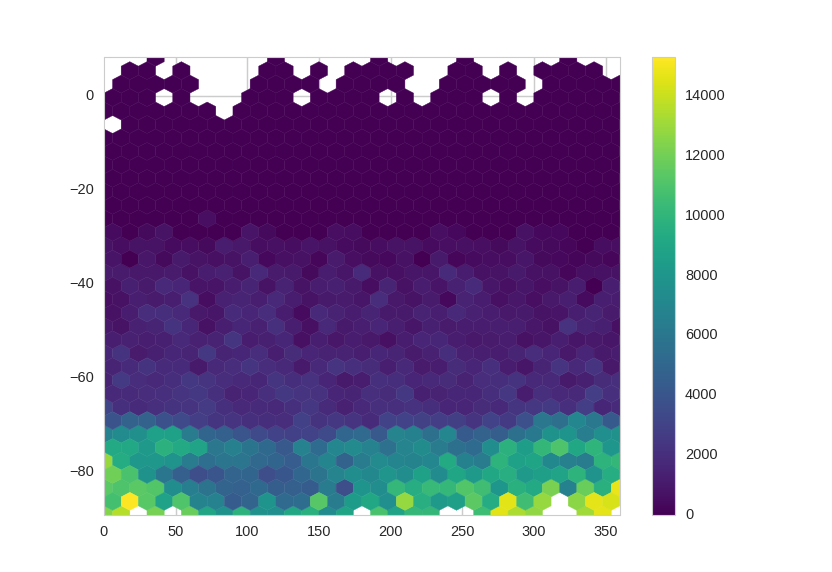

In [106]:
df = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117.h5')
plt.figure()
plt.hexbin(df.lons, df.lats, df.data, mincnt=1, gridsize=30,
           cmap='viridis')
plt.colorbar()

In [ ]:
lats, lons, data = process_fnames(io.l1b_filenames('apoapse*-muv_2015021*T',
                                                   env='production'))

fig, axes = plt.subplots(nrows=2, sharex=True)
gridsize = 35
mincnt = 1
extent = [0, 360, -90, 50]
im0 = axes[0].hexbin(lons, lats, C=data, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
plt.colorbar(im0, ax=axes[0])
axes[0].set_title('Dates: 2015021*T , Mean L1B.HDU[0] values')
im1 = axes[1].hexbin(lons, lats, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
axes[1].set_title('N entries in bin')
plt.colorbar(im1, ax=axes[1])
axes[1].set_xlabel('Longitude')
for ax in axes:
    ax.set_ylabel('Latitude')
fig.tight_layout()

In [ ]:
# lats, lons, data = process_fnames(io.l1b_filenames('apoapse*-muv_2014111*T',
#                                                    env='production'))
fig, axes = plt.subplots(nrows=2, sharex=True)

gridsize = 35
mincnt = 1
extent = [0, 360, -90, 50]
im0 = axes[0].hexbin(lons, lats, C=data, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
plt.colorbar(im0, ax=axes[0])
axes[0].set_title('Dates: 2014111*T , Mean L1B.HDU[0] values')
im1 = axes[1].hexbin(lons, lats, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
axes[1].set_title('N entries in bin')
plt.colorbar(im1, ax=axes[1])
axes[1].set_xlabel('Longitude')
for ax in axes:
    ax.set_ylabel('Latitude')
fig.tight_layout()

## Spectra for Mike Wolff

In [193]:
globstr = "apoapse*-{}_{}T".format('muv', '201111?')

In [156]:
fnames = io.l1b_filenames(globstr, env='production', iterator=False)

/maven_iuvs/production/products/level1b


In [157]:
fnames.sort()

In [158]:
def process_fname(fname):
    from iuvs.apoapse import Apoapse
    from iuvs import io
    d = {}
    d['fname']=fname
    apo = Apoapse(fname, 300)
    iuvsfname = io.ScienceFilename(fname)
    min_lat = np.nanmin(apo.lats)
    if min_lat < -80:
        d['polar'] = True
    elif min_lat > -20:
        d['equatorial'] = True
    return d

In [159]:
from ipyparallel import Client

In [160]:
c = Client()

In [161]:
lbview = c.load_balanced_view()

In [162]:
results = lbview.map_async(process_fname, fnames)

In [ ]:
for res in results:
    print(res)

In [164]:
resdf = pd.DataFrame(results.result)

In [165]:
resdf['time'] = resdf.fname.map(lambda x: io.ScienceFilename(x).time)

In [166]:
resdf.set_index('time', inplace=True)

In [167]:
resdf.sort_index(inplace=True)

In [168]:
equatorfname = resdf[resdf.equatorial==True].iloc[0].fname

In [194]:
equatorfname

'/maven_iuvs/production/products/level1b/mvn_iuv_l1b_apoapse-orbit00236-muv_20141112T041640_v02_r01.fits.gz'

In [170]:
polarfname = resdf[resdf.polar==True].iloc[0].fname

In [171]:
polarfname

'/maven_iuvs/production/products/level1b/mvn_iuv_l1b_apoapse-orbit00236-muv_20141112T032259_v02_r01.fits.gz'

In [195]:
equatorapo = Apoapse(equatorfname, 300)

In [196]:
equatorapo.spec.shape

(21, 10, 30)

In [174]:
equatorapo.p_lats[equatorapo.selector]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.616417,-0.220907,-2.982448,...,-6.877304,-8.319585,-9.528207,-10.545974,-11.401363,-12.115833,-12.706062,-13.180565,-13.547527,-13.811217
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.735046,1.202566,...,-3.394205,-5.025070,-6.368800,-7.484943,-8.411614,-9.176305,-9.799457,-10.291737,-10.662726,-10.917138
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.596675,...,0.708145,-1.219490,-2.766453,-4.026289,-5.055089,-5.890897,-6.560471,-7.077996,-7.455215,-7.697507
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.873900,3.397131,1.505586,0.014780,-1.172622,-2.116420,-2.855551,-3.410710,-3.797371,-4.021993
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.603981,6.959694,5.022291,3.549324,2.419614,1.564143,0.947297,0.545830,0.351281
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.139635,9.933660,8.381687,7.280216,6.539223,6.111514,5.983685
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
np.nanmax(equatorapo.lats)

12.139635095506193

In [76]:
%matplotlib nbagg

In [202]:
equatorapo.spec.shape

(21, 10, 30)

In [207]:
pd.DataFrame(equatorapo.spec[12:20,3,:].mean(axis=1))

,0
0,0.628251
1,0.390377
2,1.155104
3,0.624410
4,0.174934
5,0.071864
6,0.061101
7,0.064870
8,0.057167
9,0.022653


In [208]:
for_mike = pd.DataFrame(equatorapo.spec[12:20,3,:].mean(axis=1))

In [209]:
equatorapo.l1b.wavelengths.shape

(10, 30)

In [210]:
for_mike['wavelengths'] = equatorapo.l1b.wavelengths[9]

In [211]:
for_mike

,0,wavelengths
0,0.628251,176.688978
1,0.390377,182.310878
2,1.155104,187.932778
3,0.624410,193.554678
4,0.174934,199.176578
5,0.071864,204.798478
6,0.061101,210.420378
7,0.064870,216.042278
8,0.057167,221.664178
9,0.022653,227.286078


In [212]:
polarapo = Apoapse(polarfname, 300)

In [213]:
p_lats = polarapo.p_lats[polarapo.selector]

In [214]:
p_lats[p_lats < -80].dropna(how='all', axis=1)

,18,19,20,21,22,23,24,25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-80.220568,-81.566331,-82.300062,-82.165744,-81.096060,NaN,NaN
4,-80.041351,-82.026700,-83.742622,-84.847104,-84.818420,-83.545330,-81.434625,NaN
5,-81.070502,-83.283074,-85.407623,-87.131400,-87.261472,-85.490892,-83.014339,-80.201814
6,-81.522060,-83.808809,-86.137157,-88.522697,-89.001556,-86.441438,-83.751069,-80.895345
7,-81.386765,-83.535311,-85.620338,-87.379891,-87.619084,-85.901337,-83.520798,-80.851295
8,-80.746758,-82.621522,-84.274448,-85.402455,-85.494971,-84.396553,-82.511768,-80.169963
9,NaN,-81.311650,-82.589639,-83.354906,-83.368163,-82.550990,-81.042381,NaN


In [182]:
polarapo.spec.shape

(36, 10, 30)

In [217]:
polarapo.spec[21, 4:8, :].mean(axis=0)

0       -14.162146
1        -0.033326
2         4.546521
3        33.099644
4       125.936119
5       235.107147
6       571.596252
7       829.418335
8      1084.514771
9      1029.537476
10      989.384766
11      903.879211
12     1114.406250
13     1012.645874
14     1466.403076
15     2173.403076
16     4985.724121
17     4725.505371
18     4014.973877
19     5227.549805
20     9057.509766
21    11646.911133
22    10617.397461
23    11714.056641
24    11388.104492
25    12108.526367
26    14270.833984
27    20187.187500
28    23549.449219
29    32928.214844
dtype: float32

In [218]:
for_mike['polar'] = polarapo.spec[21, 4:8, :].mean(axis=0)

In [219]:
for_mike.head()

,0,wavelengths,polar
0,0.628251,176.688978,-14.162146
1,0.390377,182.310878,-0.033326
2,1.155104,187.932778,4.546521
3,0.624410,193.554678,33.099644
4,0.174934,199.176578,125.936119


In [220]:
for_mike.columns = ['equatorial', 'wavelengths', 'polar']

In [221]:
polarfname

'/maven_iuvs/production/products/level1b/mvn_iuv_l1b_apoapse-orbit00236-muv_20141112T032259_v02_r01.fits.gz'

<IPython.core.display.Javascript object>


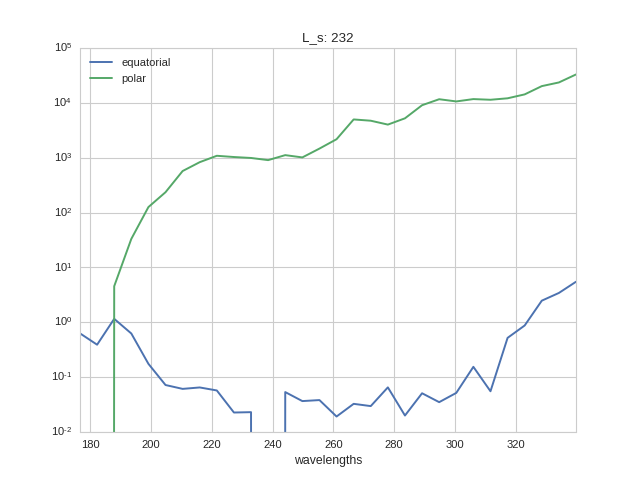

In [222]:
for_mike.set_index('wavelengths').plot(logy=True, title='L_s: 232')

In [153]:
for_mike.set_index('wavelengths', inplace=True)

In [154]:
for_mike.to_csv('L_s_288_IUVS_spectra.csv')

# L1C

In [12]:
from astropy.io import fits

In [13]:
hdulist1 = fits.open('/maven_iuvs/production/products/apoapse/day/level1c/fits/mvn_iuv_l1c_apoapse-orbit00264_20141117T115335_v02_r01.fits.gz')
hdulist2 = fits.open('/maven_iuvs/production/products/apoapse/day/level1c/fits/mvn_iuv_l1c_apoapse-orbit00607_20150121T235135_v02_r01.fits.gz')

FILENAME = mvn_iuv_l1c_apoapse-orbit00264_20141117T115335_v02_r01.fits.gz        [astropy.io.fits.card]
FILENAME = mvn_iuv_l1c_apoapse-orbit00264_20141117T115335_v02_r01.fits.gz       
START_TIME = '2014-11-17T11:53:35.98Z' /Start of first integration in file (UTC) [astropy.io.fits.card]
START_TIME = '2014-11-17T11:53:35.98Z' /Start of first integration in file (UTC)
STOP_TIME = '2014-11-17T13:21:31.36Z' /End of last integration in file (UTC)     [astropy.io.fits.card]
STOP_TIME = '2014-11-17T13:21:31.36Z' /End of last integration in file (UTC)    
FILENAME = mvn_iuv_l1c_apoapse-orbit00607_20150121T235135_v02_r01.fits.gz        [astropy.io.fits.card]
FILENAME = mvn_iuv_l1c_apoapse-orbit00607_20150121T235135_v02_r01.fits.gz       
START_TIME = '2015-01-21T23:51:35.47Z' /Start of first integration in file (UTC) [astropy.io.fits.card]
START_TIME = '2015-01-21T23:51:35.47Z' /Start of first integration in file (UTC)
STOP_TIME = '2015-01-22T01:17:03.59Z' /End of last integration in file (UTC

In [14]:
hdu1 = hdulist1[2]
hdu2 = hdulist2[2]

In [15]:
hdulist2[-1].data['WAVELENGTH_MUV'][0][17]

272.26127905700918

In [16]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

In [17]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


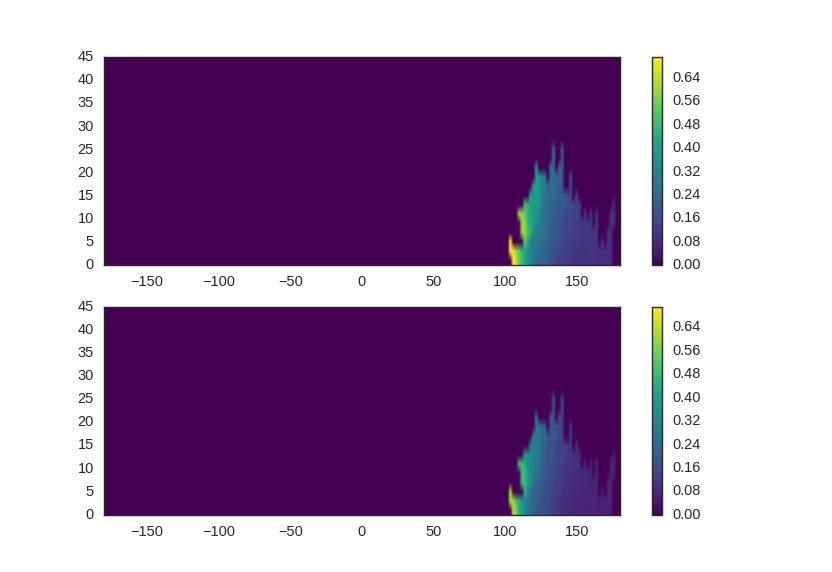

In [18]:
refl1 = hdu2.data['REFLECTANCE'][0][10]
refl2 = hdu2.data['REFLECTANCE'][0][17]

fig, axes = plt.subplots(nrows=2)
for ax, ref in zip(axes, [refl1, refl2]):
    im = ax.imshow(ref.T, origin='lower', vmax=refl1.max(), cmap='viridis', vmin=0,
                   extent=[-180, 180, -90, 90], aspect='auto')
    ax.set_ylim(0,45)
    plt.colorbar(im, ax=ax)

In [36]:
ratio = refl1/refl2

<IPython.core.display.Javascript object>


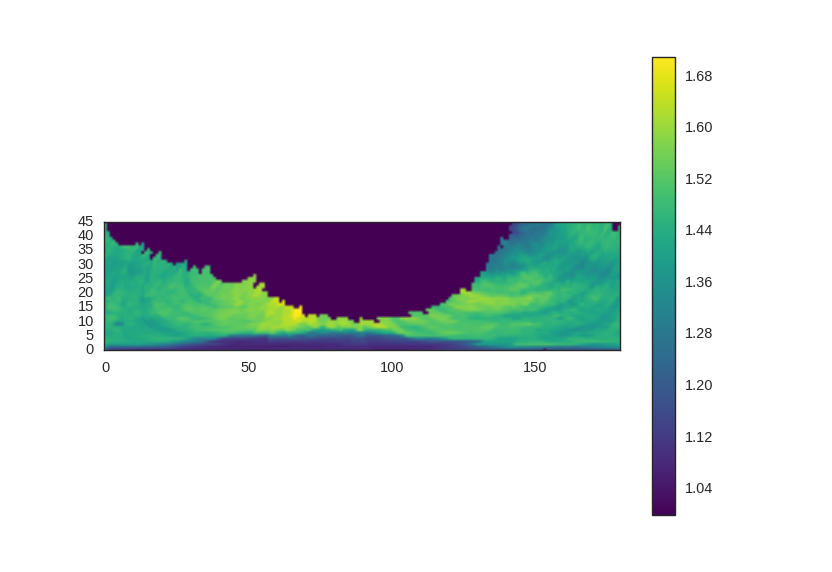

In [37]:
plt.figure()
plt.imshow(ratio.T, origin='lower', cmap='viridis')
plt.ylim(0, 45)
plt.colorbar()

<IPython.core.display.Javascript object>


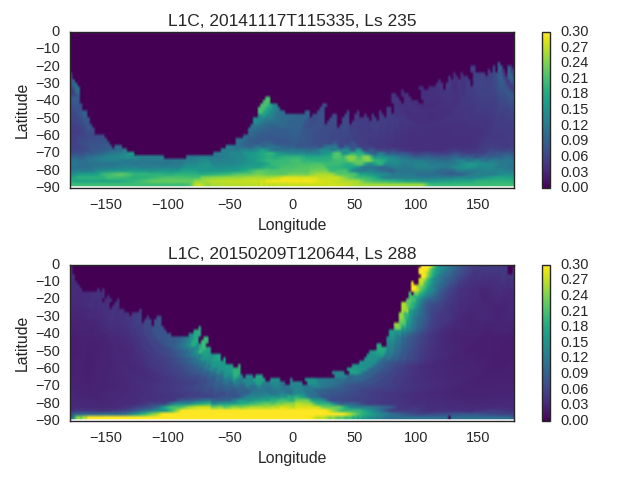

In [23]:
refl1 = hdu1.data['REFLECTANCE'][0][20]
refl2 = hdu2.data['REFLECTANCE'][0][20]

fig, axes = plt.subplots(nrows=2, figsize=(8,6))
for ax, ref, t in zip(axes, [refl1, refl2], ['20141117T115335, Ls 235','20150209T120644, Ls 288']):
    im = ax.imshow(ref.T, origin='lower', cmap='viridis', vmax=0.3, vmin=0,
                   aspect='auto', extent=[-179, 179, -89, 89])
    ax.set_ylim(-90,0)
    ax.set_title("L1C, " +t)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.colorbar(im, ax=ax)
fig.tight_layout()
fig.savefig('L1C_comparison.pdf', dpi=150)


In [101]:
hdu.header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =             11664000 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    3 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'reflectance_muv'                                                     
COMMENT                     

In [102]:
hdulist1[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11         
BITPIX  =                   32 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /Extensions may be present                       
COMMENT IUVS Principal Investigator N. Schneider                                
COMMENT Laboratory for Atmospheric and Space Physics                            
COMMENT University of Colorado Boulder                                          
COMMENT 1234 Innovation Drive, Boulder CO 80303                                 
COMMENT MAVEN Mission scientific and model results are open to all.             
COMMENT Users should contact the PI or designated IUVS team member early in an  
COMMENT analysis project to discuss appropriate use of instrument data results. 
COMMENT Appropriate acknowledgement to institutions, personnel, and funding     
COMMENT agencies should be g

In [190]:
hdulist1[5].data['LONGITUDE'][0]

array([-179., -177., -175., -173., -171., -169., -167., -165., -163.,
       -161., -159., -157., -155., -153., -151., -149., -147., -145.,
       -143., -141., -139., -137., -135., -133., -131., -129., -127.,
       -125., -123., -121., -119., -117., -115., -113., -111., -109.,
       -107., -105., -103., -101.,  -99.,  -97.,  -95.,  -93.,  -91.,
        -89.,  -87.,  -85.,  -83.,  -81.,  -79.,  -77.,  -75.,  -73.,
        -71.,  -69.,  -67.,  -65.,  -63.,  -61.,  -59.,  -57.,  -55.,
        -53.,  -51.,  -49.,  -47.,  -45.,  -43.,  -41.,  -39.,  -37.,
        -35.,  -33.,  -31.,  -29.,  -27.,  -25.,  -23.,  -21.,  -19.,
        -17.,  -15.,  -13.,  -11.,   -9.,   -7.,   -5.,   -3.,   -1.,
          1.,    3.,    5.,    7.,    9.,   11.,   13.,   15.,   17.,
         19.,   21.,   23.,   25.,   27.,   29.,   31.,   33.,   35.,
         37.,   39.,   41.,   43.,   45.,   47.,   49.,   51.,   53.,
         55.,   57.,   59.,   61.,   63.,   65.,   67.,   69.,   71.,
         73.,   75.,

In [194]:
hdulist1[5].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               260280 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    6 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'apoapse_geometry'                                                    
TUNIT1  = 'deg'             